# Background

Climate change has been a stuff of debate for many years. As a Clean Energy graduate from Temasek Poly, I always wonder why am I being taught alternative ways to generate energy, yet, most countries are still generating energy the "destructive" ways - which some assume to be the cause of climate change as current energy generation emits greenhouse gases.

I always thought to myself,

* *is climate change not true?*

* *is climate change just a sign of the earth aging and has nothing to do with greenhouse gases?*

I would like to take this opportunity to see how Data Science can be used to answer the above question.


## Risk / Limitation

* The countries listed in each datasets varies. As such, some contries will not be present in the final dataframe.
* Can't find the dictionary for each dataset. The greenhouse emission data has long column name which is hard to understand.


## Proposal

For this project proposal, I will be doing a project regarding Climate change.

My current Null hypothesis : **"Climate change has no correlation with Greenhouse emissions"**

The datasets I obtained are from this link:

Temperature data:

https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data/kernels

International greenhouse emission data:

https://www.kaggle.com/unitednations/international-greenhouse-gas-emissions


<h4> Import all required package/module </h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

%matplotlib inline

<h4> Create temp_by_country dataframe </h4>

In [2]:
temp_by_country_file = 'Temperature/GlobalLandTemperaturesByCountry.csv'
col_names = ['dt', 'Averagetemperature', 'AverageTemperatureUncertainty', 'country']
temp_by_country = pd.read_csv(temp_by_country_file,names = col_names,skiprows = 1)
#set dt column to datetime
temp_by_country['dt'] = pd.to_datetime(temp_by_country.dt)

In [3]:
temp_by_country.head()

,dt,Averagetemperature,AverageTemperatureUncertainty,country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


<h4> Create global_temperature dataframe </h4>

In [4]:
global_temperature_file = 'Temperature/GlobalTemperatures.csv'
global_temp = pd.read_csv(global_temperature_file)
#set dt column to datetime
global_temp['dt'] = pd.to_datetime(global_temp.dt)

In [5]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


<h4> Create emissions_by_country dataframe </h4>

In [6]:
emissions_by_country_file = 'Greenhouse-Gasses/greenhouse_gas_inventory_data_data.csv'
emissions_by_country = pd.read_csv(emissions_by_country_file)
emissions_by_country.rename(columns = {'country_or_area' : 'country'}, inplace = True);

#replace the lengthy string in Category column to a shorter string
to_replace = emissions_by_country.category.unique()
replace_with = ['co2','ghgs','ghgs2','hfcs','ch4','nf3','n2o','pfcs','sf6','hfcs-pfcs']
emissions_by_country['category'].replace(to_replace,replace_with, inplace = True)
emissions_by_country.replace('United States of America', 'United States', inplace = True)

In [7]:
emissions_by_country.head()

,country,year,value,category
0,Australia,2014,393126.946994,co2
1,Australia,2013,396913.936530,co2
2,Australia,2012,406462.847704,co2
3,Australia,2011,403705.528314,co2
4,Australia,2010,406200.993184,co2


<h4> Exploring global temp dataframe </h4>

 Let's visualize the land's average, max and min temperature over the years.

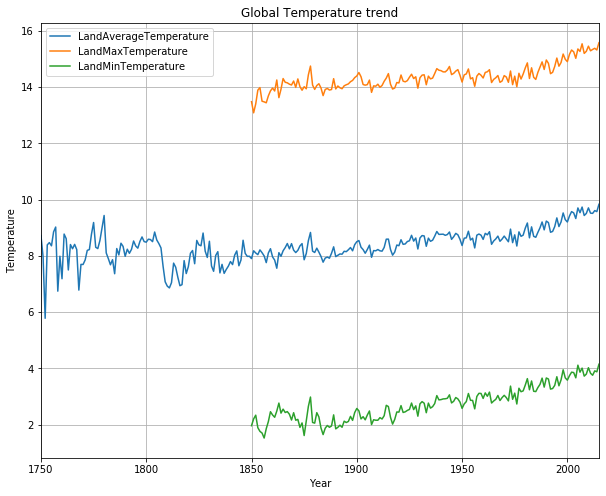

In [8]:
mask = ['LandAverageTemperature', 'LandMaxTemperature','LandMinTemperature']
global_temp.groupby(global_temp['dt'].dt.year)[mask].mean().plot(figsize = (10,8), grid = True)
plt.title('Global Temperature trend');
plt.xlabel('Year');
plt.ylabel('Temperature');
plt.show()

*Observation : Seems like the min, max and mean temperature are rising as the year increases.*

<h4> Exploring temperature by country dataframe </h4>

Lets look at the *mean* temperature trend of all countries combined over the years.


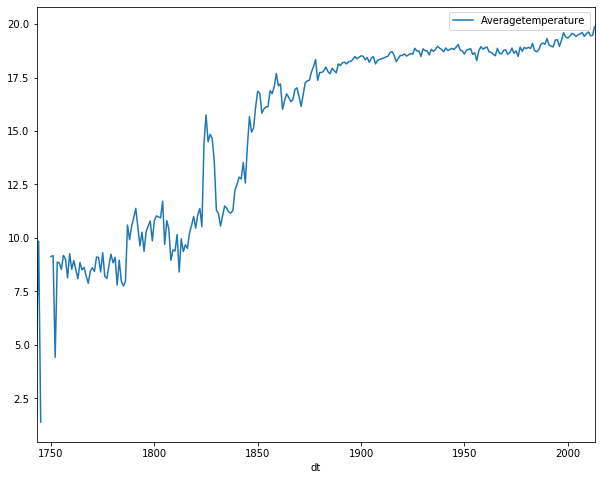

In [9]:
temp_by_country.groupby([temp_by_country['dt'].dt.year])['Averagetemperature'].mean().plot(figsize = (10,8), legend = True);

*Observation : The mean temperature fluctuates in the earlier years. However, the mean temperature has an increasing trend starting from 1850. Suggesting increase of global temperature*

<h4> Exploring temperature by country dataframe </h4>

1. Top 10 hottest/coldest countries
2. How these 10 countries change in temperature over years

In [10]:
#creating a function that prints 10 subplots 
def top_10(argument):
    # Initialize the figure
    plt.figure(figsize = (20,8))
    plt.style.use('seaborn-darkgrid')
    
    # create a color palette
    palette = plt.get_cmap('Set1')
    num = 0
    
    #get the top 10 countries
    if argument == 'min':
        top10 = temp_by_country.groupby('country')['Averagetemperature'].min().sort_values(ascending = True).head(10)
    elif argument == 'max':
        top10 = temp_by_country.groupby('country')['Averagetemperature'].max().sort_values(ascending = False).head(10)
          
    for country in top10.index:
        num +=1 
    
        #Find the right spot on the plot
        plt.subplot(2,5, num)
    
        #get the dataframe
        mask = temp_by_country['country'] == country
        data = temp_by_country[mask].groupby(temp_by_country['dt'].dt.year)['Averagetemperature'].mean()

        #plot the dataframe
        plt.plot(data.index , data.values, marker='', color=palette(num), linewidth=1, alpha=0.9, label=country)
        plt.xlim(temp_by_country['dt'].dt.year.min(),temp_by_country['dt'].dt.year.max())
        plt.ylim()   
        plt.legend(loc=2, ncol=2)

        plt.xlabel('Year')
        plt.ylabel('Mean Temperature')
    #plt.title(country, loc='left', fontsize=12, fontweight=0, color=palette(num) )
    if argument == 'min':
        plt.suptitle("Top 10 Coldest countries Temperature trend", fontsize=20, fontweight=0, color='black', style='italic', y=1.02);
    elif argument == 'max':
        plt.suptitle("Top 10 Hottest countries Temperature trend", fontsize=20, fontweight=0, color='black', style='italic', y=1.02);

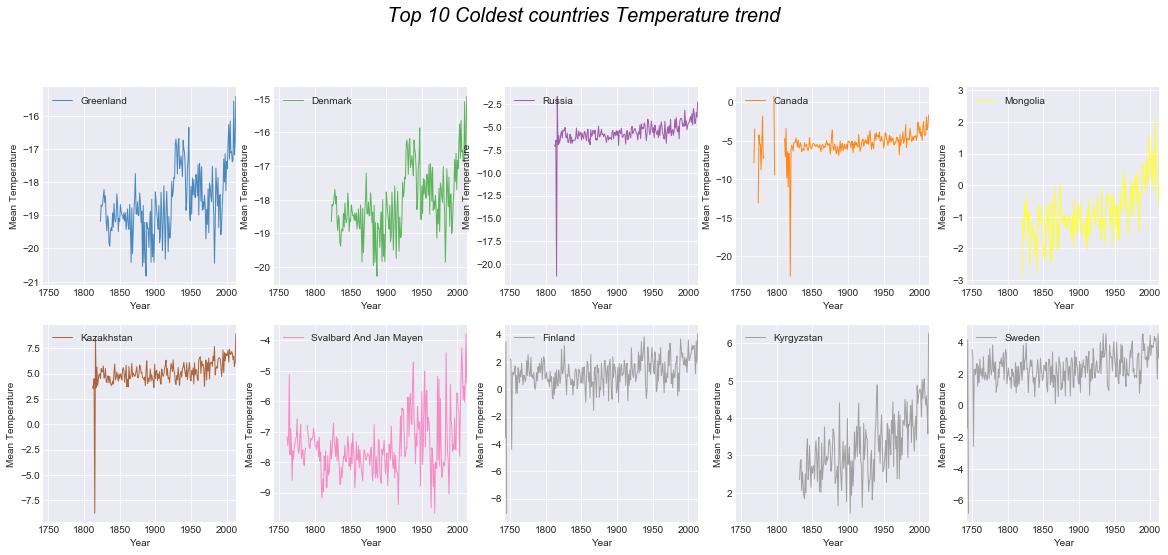

In [11]:
top_10('min')

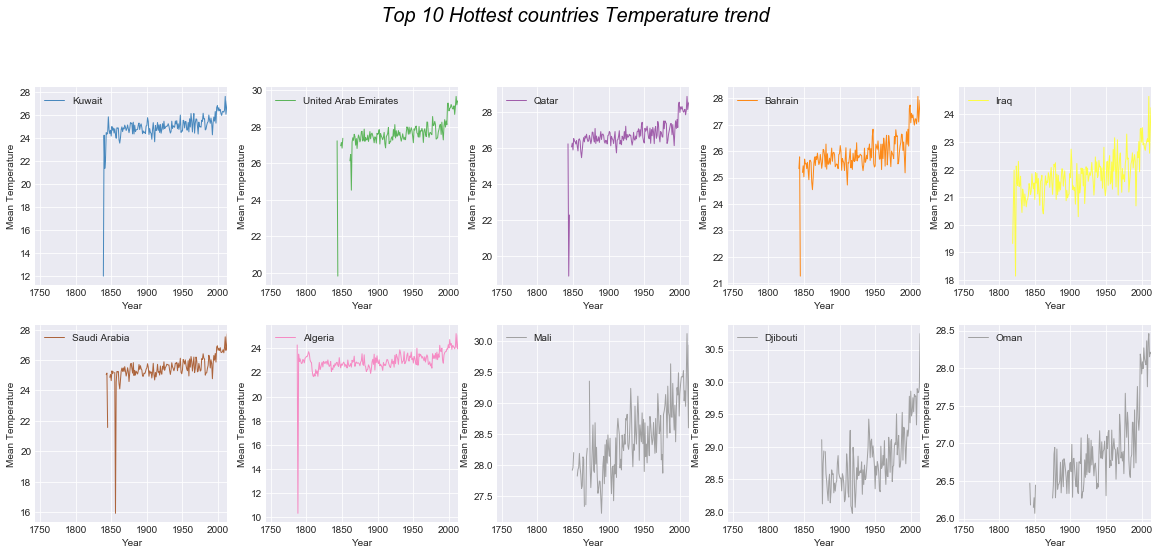

In [12]:
top_10('max')

*Observation : All these 20 countries are seen having similar trend. Temperature are rising towards the year 2000*

<h4> Exploring the emissions dataframe </h4>

Shape of dataframe: (8406, 4)

Total number of countries: 43

Total number of categories: 10

Total number of data per category: 



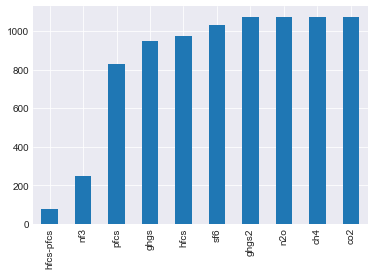

In [13]:
print('Shape of dataframe: {}\n'.format(emissions_by_country.shape))
print('Total number of countries: {}\n'.format(emissions_by_country['country'].nunique()))
print('Total number of categories: {}\n'.format(emissions_by_country['category'].nunique()))
print('Total number of data per category: \n'.format(emissions_by_country['category'].value_counts(ascending = True)))

emissions_by_country['category'].value_counts(ascending = True).plot(kind = 'bar');

*Observation :  Only 4 categories have complete data. The rest of the categories are missing some datas.*

<h4> Let's visualize the mean emission per category over the years </h4>

Text(0.5, 1.0, 'Mean emissions per category')

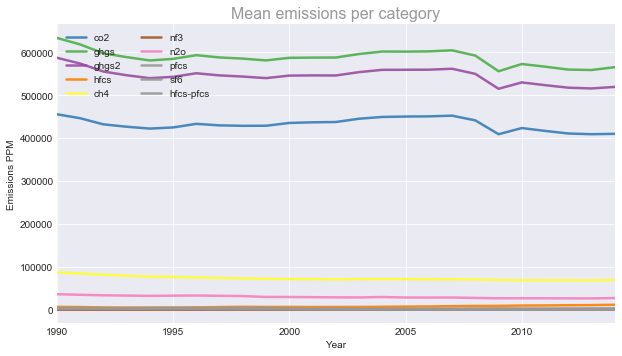

In [35]:
plt.figure(figsize = (10,5.5))

# create a color palette
palette = plt.get_cmap('Set1')

num = 0
for category in emissions_by_country['category'].unique():
    new = emissions_by_country.loc[(emissions_by_country['category'] == category)].groupby('year').mean()
    num += 1

    plt.plot(new.index, new.values, marker='', color=palette(num), linewidth=2.5, alpha=0.9, label=category)

    plt.xlim(emissions_by_country.year.min(),emissions_by_country.year.max())
    plt.ylim()   
    plt.legend(loc=2, ncol=2)
    

    plt.xlabel('Year')
    plt.ylabel('Emissions PPM')

plt.title('Mean emissions per category', fontsize=16, fontweight=0, color=palette(num))

Observation : The top 5 highest categories are: 

1. ghgs   <b>(this category will be ignored due to insufficient data)</b>

2. ghgs2

3. co2

4. ch4

5. n2o

<h4>Countries with highest emissions of co2, ghgs2 and ghgs</h4>

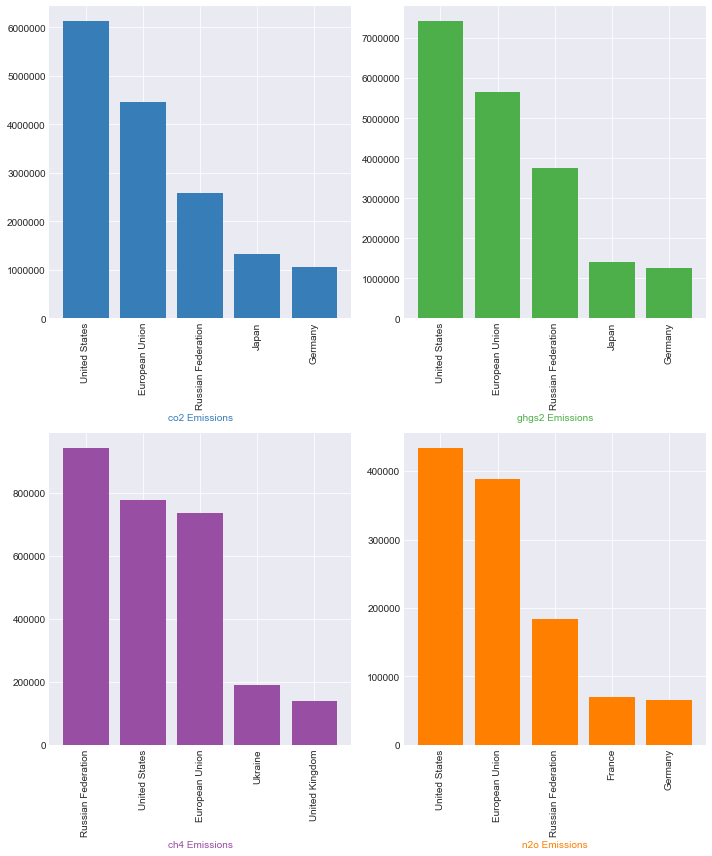

In [15]:
cat = ['co2', 'ghgs2', 'ch4', 'n2o']
plt.figure(figsize = (10,12))
n = 0
for cat in cat:
    n += 1
    plt.subplot(2,2, n)
    mask = emissions_by_country['category'] == cat
    data = emissions_by_country.loc[mask].groupby('country')['value'].max().sort_values(ascending = False).head(5)
    plt.bar(data.index, data.values, color=palette(n))
    
    plt.xticks(rotation='vertical')
    plt.xlabel(cat + ' Emissions', color=palette(n))
    
    plt.ylim()
    
    plt.tight_layout()

<h4> Lets create a new dataframe that contains both temperature and emissions per Country/Year </h4>

In [16]:
mean_temp_df = pd.DataFrame(temp_by_country.groupby(['country',temp_by_country['dt'].dt.year]).mean()['Averagetemperature'])
mean_temp_df.reset_index(inplace= True)
mean_temp_df.rename(columns ={'dt' : 'year'}, inplace = True)

In [17]:
mean_temp_df.head()

,country,year,Averagetemperature
0,Afghanistan,1838,18.379571
1,Afghanistan,1839,NaN
2,Afghanistan,1840,13.413455
3,Afghanistan,1841,13.997600
4,Afghanistan,1842,15.154667


In [18]:
merge_df= pd.merge(mean_temp_df, emissions_by_country, on = ['country','year'])

In [19]:
merge_df.head()

,country,year,Averagetemperature,value,category
0,Australia,1990,22.35575,278265.898941,co2
1,Australia,1990,22.35575,418623.049563,ghgs
2,Australia,1990,22.35575,418623.049563,ghgs2
3,Australia,1990,22.35575,1424.683520,hfcs
4,Australia,1990,22.35575,118768.837813,ch4


In [20]:
category = ['co2','ghgs2','ch4','n2o']
df = {}

for cat in category:
    df_name = cat + '_df' # the name for the dataframe
    mask = merge_df['category'] == cat
    df[df_name] = merge_df[mask].copy()
    df[df_name].reset_index(drop = True, inplace = True)
    df[df_name].rename(columns = {'value' : cat + '_value'}, inplace = True)
    df[df_name].drop('category', axis = 1, inplace = True)

In [21]:
print('Shape of co2_df   : {}'. format(df['co2_df'].shape))
print('Shape of ghgs2_df : {}'. format(df['ghgs2_df'].shape))
print('Shape of ch4_df   : {}'. format(df['ch4_df'].shape))
print('Shape of n2o_df   : {}'. format(df['n2o_df'].shape))

Shape of co2_df   : (984, 4)
Shape of ghgs2_df : (984, 4)
Shape of ch4_df   : (984, 4)
Shape of n2o_df   : (984, 4)


In [22]:
merge1 = pd.merge(df['co2_df'], df['ghgs2_df'], how='outer', on=['country', 'year','Averagetemperature'])
merge2 = pd.merge(merge1, df['ch4_df'], how='outer', on=['country', 'year','Averagetemperature'])
final_df = pd.merge(merge2, df['n2o_df'], how='outer', on=['country', 'year','Averagetemperature'])

In [23]:
final_df.shape

(984, 7)

In [24]:
final_df.head()

,country,year,Averagetemperature,co2_value,ghgs2_value,ch4_value,n2o_value
0,Australia,1990,22.355750,278265.898941,418623.049563,118768.837813,15345.597858
1,Australia,1991,22.487417,279741.639012,418674.057494,117744.641814,14923.405021
2,Australia,1992,21.932583,284766.092718,423080.108191,116837.506726,15293.183355
3,Australia,1993,22.160167,289142.267681,423764.932564,113837.511923,15374.993428
4,Australia,1994,22.030250,293830.709141,424092.959373,110997.410185,15790.426852


<h4> Let's visualize the distribution of all the features and response</h4>

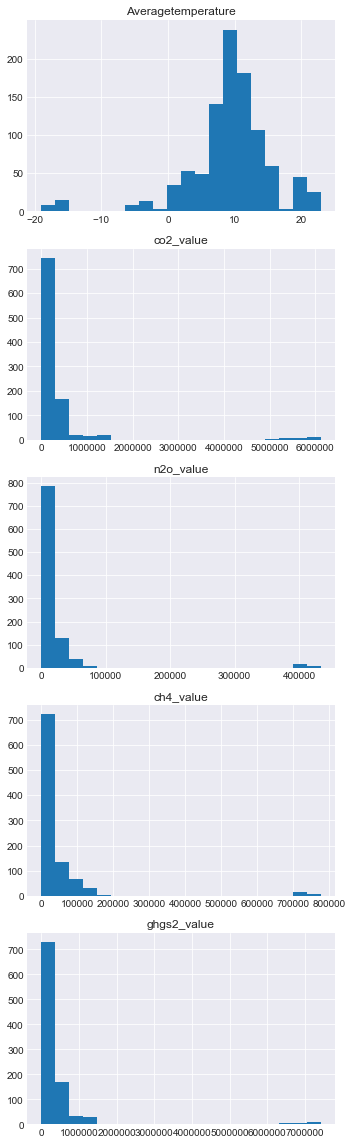

In [25]:
mask = ['Averagetemperature', 'co2_value', 'n2o_value', 'ch4_value', 'ghgs2_value']
num = 0
plt.figure(figsize = (5,16))
for mask in mask:
    num += 1
    plt.subplot(5,1, num)
    ax = final_df[mask].hist(bins=20)
    ax.set_title(mask);
      
    plt.tight_layout()
    

<h4> Lets visualize the 4 categories using a boxplot </h4>

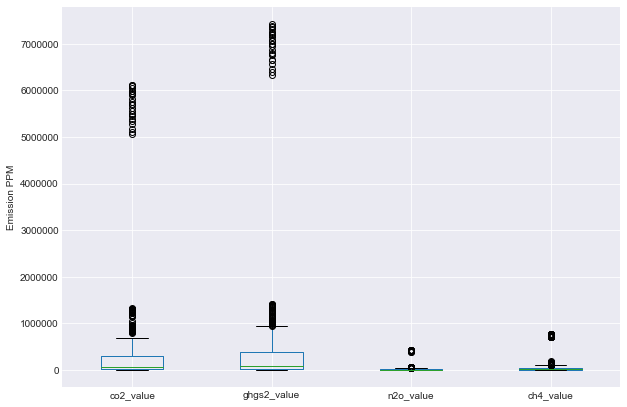

In [26]:
plt.figure(figsize = (10,7))
final_df.boxplot(['co2_value', 'ghgs2_value', 'n2o_value', 'ch4_value'])
plt.ylabel('Emission PPM')
plt.show()

In [27]:
final_df.describe()

,year,Averagetemperature,co2_value,ghgs2_value,ch4_value,n2o_value
count,984.000000,984.000000,9.840000e+02,9.840000e+02,984.000000,984.000000
mean,2001.500000,9.200718,3.111397e+05,3.838527e+05,44255.450384,21413.414225
std,6.925707,6.413905,8.875864e+05,1.082844e+06,114879.921461,62946.777654
min,1990.000000,-19.000417,7.188190e+01,8.672830e+01,0.849257,1.645551
25%,1995.750000,7.105708,2.051474e+04,2.638403e+04,3801.775000,2501.241493
50%,2001.500000,9.707583,5.982317e+04,7.751011e+04,11359.937441,6050.539013
75%,2007.250000,12.303667,2.942995e+05,3.930941e+05,43016.929331,18339.370010
max,2013.000000,22.896833,6.122747e+06,7.422208e+06,777034.220915,433872.649154


<h3> Modelling section <h/3>

<h4> Plotting the least mean square line </h4>

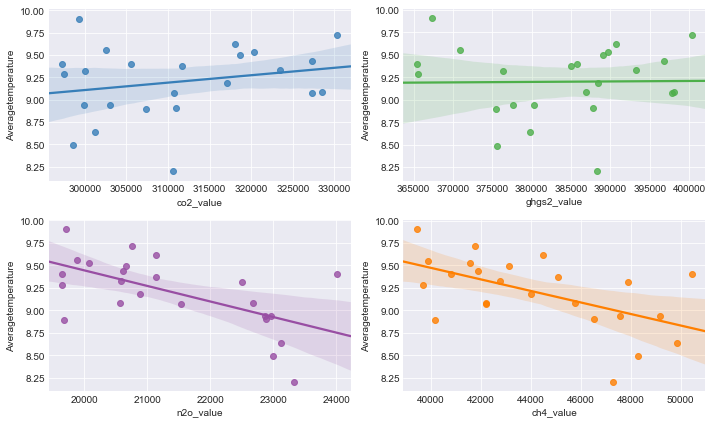

In [28]:
# library & dataset

plt.figure(figsize = (10,6))
x_axis = ['co2_value','ghgs2_value','n2o_value','ch4_value']
n = 1
for x in x_axis:
    plt.subplot(2,2,n)
    mean = final_df.groupby('year').mean()
    sns.regplot(x=mean[x], y=mean["Averagetemperature"], color=palette(n))
    n += 1
    
    plt.tight_layout()
    
    # Without regression fit:
    #sns.regplot(x=final_df[x], y=final_df[y], fit_reg=False)

<h4> Let's visualize the correlation with a heatmap </h4>

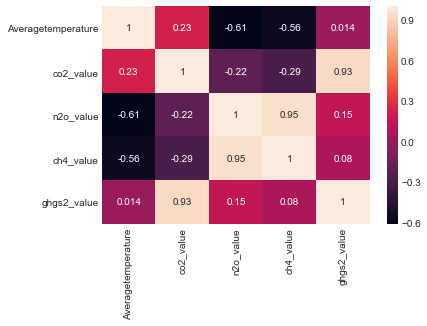

In [29]:
cats = ['Averagetemperature','co2_value','n2o_value','ch4_value', 'ghgs2_value']
temp_emiss_corr = final_df.groupby('year').mean()[cats].corr();
sns.heatmap(temp_emiss_corr, annot = True);

<h4> Create a mean dataframe per year </h4>

In [30]:
mean_data = final_df.groupby('year').mean()

In [31]:
mean_data.head()

,Averagetemperature,co2_value,ghgs2_value,ch4_value,n2o_value
year,,,,,
1990,9.402640,305595.287928,385782.858522,50443.209237,24011.134018
1991,8.636589,301205.624439,379733.191188,49839.881596,23126.587296
1992,8.942246,299967.678430,377586.625226,49164.387209,22874.501426
1993,8.490705,298644.311145,375608.237314,48293.605417,22998.650518
1994,9.317268,299977.477002,376309.318836,47911.358707,22496.882103


<h4> Hypothesis Testing and p-values </h4>

In [32]:
Y=mean_data['Averagetemperature']
X=mean_data[['co2_value','ghgs2_value','ch4_value','n2o_value']]
X = sm.add_constant(X)
model1 = sm.OLS(Y, X)
results = model1.fit()
results.summary()

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Averagetemperature   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     3.336
Date:                Fri, 01 Nov 2019   Prob (F-statistic):             0.0314
Time:                        22:52:48   Log-Likelihood:                -5.0754
No. Observations:                  24   AIC:                             20.15
Df Residuals:                      19   BIC:                             26.04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.9259      4.953      1.600      0.126      -2.441      18.293
co2_value      -0.0001      0.000     -0.813      0.426      -0.000       0.000
ghgs2_value     0.0001      0.000      0.843      0.410      -0.000       0.001
ch4_value   -2.702e-05      0.000     -0.250      0.805      -0.000       0.000
n2o_value      -0.0005      0.000     -1.522      0.144      -0.001       0.000
==============================================================================
Omnibus:                        0.875   Durbin-Watson:                   2.200
Prob(Omnibus):                  0.646   Jarque-Bera (JB):                0.150
Skew:                          -0.142   Prob(JB):                        0.928
Kurtosis:                       3.263   Cond. No.                     3.59e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*observation: the P>|t| value for ch4_value is high. Let's omit this category for the next model.*

In [33]:
Y=mean_data['Averagetemperature']
X=mean_data[['co2_value','ghgs2_value','n2o_value']]
X = sm.add_constant(X)
model2 = sm.OLS(Y, X)
results = model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Averagetemperature   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     4.644
Date:                Fri, 01 Nov 2019   Prob (F-statistic):             0.0127
Time:                        22:52:48   Log-Likelihood:                -5.1149
No. Observations:                  24   AIC:                             18.23
Df Residuals:                      20   BIC:                             22.94
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.7031      3.766      2.311      0.032       0.847      16.559
co2_value      -0.0001      0.000     -0.993      0.333      -0.000       0.000
ghgs2_value     0.0001      0.000      1.030      0.315      -0.000       0.000
n2o_value      -0.0005      0.000     -1.564      0.133      -0.001       0.000
==============================================================================
Omnibus:                        0.557   Durbin-Watson:                   2.207
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.045
Skew:                          -0.084   Prob(JB):                        0.978
Kurtosis:                       3.128   Cond. No.                     2.78e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*observation* :

* co2_value, ghgs2_value and n2o_value have high p-values, 
* Fail to reject the null hypothesis for co2_value, ghgs2_value and n2o_value
* There is not enough data to prove correlation between global temperature and Greenhouse emission 